<a href="https://colab.research.google.com/github/NahiHaile/Machine-Learning-Course/blob/main/Assignment_1_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets


# read excel files for x1, x2, x3, and y
from google.colab import drive
drive.mount('/content/GoogleDrive')
%cd /content/GoogleDrive/MyDrive/Colab Notebooks

data=pd.read_excel("D3.xlsx")
x1=data["X1"]
x2=data["X2"]
x3=data["X3"]
y=data["Y"]

# Normalize data for better convergence
x1_n = (x1 - np.mean(x1)) / np.std(x1)
x2_n = (x2 - np.mean(x2)) / np.std(x2)
x3_n = (x3 - np.mean(x3)) / np.std(x3)

# Add bias term
n=len(data)
x1_b = np.c_[np.ones((n, 1)), x1_n]
x2_b = np.c_[np.ones((n, 1)), x2_n]
x3_b = np.c_[np.ones((n, 1)), x3_n]

# Function to compute cost (Mean Squared Error)
def compute_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# Gradient Descent Function
def gradient_descent(X, y, learning_rate, iterations):
    m = len(y)
    theta = np.zeros(2)  # Initialize parameters randomly
    cost_history = []

    for i in range(iterations):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(theta, X, y))

    return theta, cost_history



Mounted at /content/GoogleDrive
/content/GoogleDrive/MyDrive/Colab Notebooks


In [30]:
# Interactive visualization of learning rates
def plot_gradient_descent(learning_rate):
    iterations = 50
    _, cost_history = gradient_descent(x3_b, y, learning_rate=learning_rate, iterations=iterations)
    plt.figure(figsize=(8, 5))
    plt.plot(range(iterations), cost_history, label=f'Learning Rate: {learning_rate}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost Function')
    plt.title('Effect of Learning Rate on Gradient Descent Convergence')
    plt.legend()
    plt.grid()
    plt.show()

# Create interactive widget
learning_rate_slider = widgets.FloatLogSlider(
    value=0.1,
    base=10,
    min=-2,  # 0.01
    max=-1,   # 0.1
    step=0.01,
    description='Learning Rate',
    continuous_update=False
)

widgets.interactive(plot_gradient_descent, learning_rate=learning_rate_slider)

interactive(children=(FloatLogSlider(value=0.1, continuous_update=False, description='Learning Rate', max=-1.0…

In [31]:
theta_opt, cost = gradient_descent(x3_b, y, learning_rate=0.1, iterations=50)
print("Optimized Theta:", theta_opt)
print("cost at optimized theta",cost[-1] )

Optimized Theta: [ 1.84173459 -0.59918584]
cost at optimized theta 3.6295014581223954


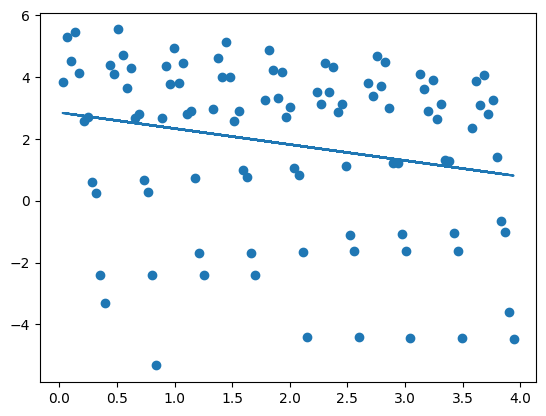

In [32]:
def Model(theta_opt,X):
  m=len(X)
  #X=np.c_[np.ones((m,1)),X]
  return X.dot(theta_opt)
#xx=np.linspace(0,5,100)
plt.scatter(x3,y)
plt.plot(x3,Model(theta_opt,x3_b))
#plt.plot(xx,Model(theta_opt,x1))
plt.show()


In [38]:
np.mean(x3)


1.9600000000000002